In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas
import os


In [10]:
main_df = pandas.read_csv("./hotel_bokings_2016.csv", sep=',')

In [11]:
main_df


,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,days_in_hotel,all_guests
0,3738,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02,1,2.0
1,3739,Resort Hotel,0,109,2016,January,1,1,0,1,...,NaN,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02,1,4.0
2,3740,Resort Hotel,1,2,2016,January,1,1,0,1,...,NaN,0,Transient,89.00,0,1,No-Show,2016-01-01,1,2.0
3,3741,Resort Hotel,0,88,2016,January,1,1,0,2,...,NaN,0,Transient,73.46,0,2,Check-Out,2016-01-03,2,2.0
4,3742,Resort Hotel,1,20,2016,January,1,1,0,2,...,NaN,0,Transient,119.00,0,0,Canceled,2015-12-22,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56702,104142,City Hotel,0,17,2016,December,53,30,2,5,...,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06,7,2.0
56703,104145,City Hotel,0,177,2016,December,53,30,2,5,...,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06,7,0.0
56704,104147,City Hotel,0,107,2016,December,53,31,2,5,...,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07,7,2.0
56705,104216,City Hotel,0,310,2016,December,53,27,2,10,...,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08,12,2.0


In [12]:
main_df_correlation = main_df.corr()
main_df_correlation

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,days_in_hotel,all_guests
Unnamed: 0,1.000000,-0.300641,-0.072053,NaN,0.166995,0.007490,-0.145470,-0.201397,-0.005770,-0.007962,...,0.006619,-0.019679,-0.665054,-0.342605,0.009822,0.149129,-0.113609,0.160162,-0.207425,-0.013348
is_canceled,-0.300641,1.000000,0.282840,NaN,0.040619,-0.001884,-0.010207,0.036181,0.040557,0.005767,...,-0.056272,-0.133375,-0.091284,-0.025942,0.097674,0.048452,-0.201735,-0.267463,0.022967,0.030426
lead_time,-0.072053,0.282840,1.000000,NaN,0.202826,0.000032,0.057738,0.191726,0.105770,-0.061545,...,-0.075189,0.010061,-0.103544,0.191224,0.259226,-0.084956,-0.119589,-0.124194,0.165697,0.039663
arrival_date_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,0.166995,0.040619,0.202826,NaN,1.000000,0.043216,0.038394,0.040980,0.055114,0.024288,...,-0.002104,0.025085,-0.005897,0.235133,-0.026349,0.144624,-0.007676,0.128717,0.045667,0.057144
arrival_date_day_of_month,0.007490,-0.001884,0.000032,NaN,0.043216,1.000000,-0.002414,-0.014670,0.003844,0.019200,...,-0.004661,0.025172,-0.017340,0.074321,0.013992,0.016794,0.006463,0.002578,-0.011890,0.015114
stays_in_weekend_nights,-0.145470,-0.010207,0.057738,NaN,0.038394,-0.002414,1.000000,0.492611,0.102202,0.037920,...,-0.038162,0.071853,0.113716,0.080767,-0.065003,0.030313,-0.022462,0.083835,0.760792,0.103036
stays_in_week_nights,-0.201397,0.036181,0.191726,NaN,0.040980,-0.014670,0.492611,1.000000,0.102559,0.029443,...,-0.053141,0.096524,0.142399,0.139661,-0.005069,0.034298,-0.037205,0.053987,0.939563,0.098444
adults,-0.005770,0.040557,0.105770,NaN,0.055114,0.003844,0.102202,0.102559,1.000000,0.026723,...,-0.131937,-0.047598,-0.062558,0.211586,-0.008229,0.257982,0.018927,0.166134,0.116692,0.779546
children,-0.007962,0.005767,-0.061545,NaN,0.024288,0.019200,0.037920,0.029443,0.026723,1.000000,...,-0.023044,0.040341,0.015404,0.050497,-0.040986,0.301741,0.062196,0.079194,0.036876,0.628193


<AxesSubplot:>

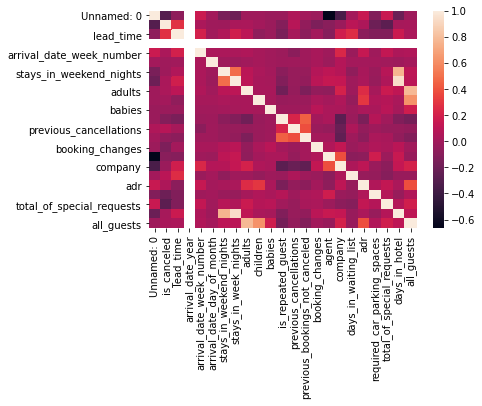

In [13]:
sns.heatmap(main_df_correlation)

<AxesSubplot:>

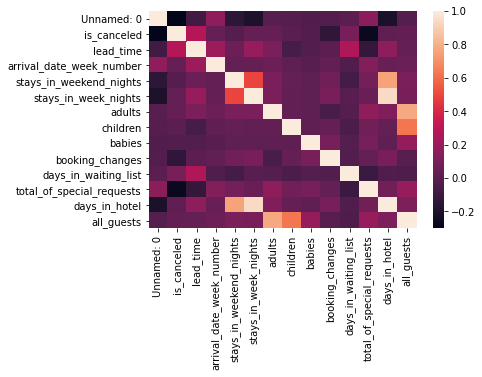

In [14]:
df = main_df.copy()
df = df.drop(columns=['arrival_date_year',
                      'required_car_parking_spaces',
                      'arrival_date_day_of_month',
                      'meal', 'country',
                      'market_segment', 'distribution_channel',
                      'is_repeated_guest', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'reserved_room_type',
                      'deposit_type', 'agent', 'company', 'customer_type', 'adr',
                      'reservation_status', 'reservation_status_date'
                     ])
sns.heatmap(df.corr())


NameError: name 'w' is not defined

In [29]:
plt.rcParams['figure.figsize'] = [15, 5]
def plot_two_columns(col_one_name, col_two_name):
    x = df[col_one_name]
    y = df[col_two_name]
    plt.ylabel(col_two_name)
    plt.xlabel(col_one_name)
    plt.scatter(x,y, marker='.', alpha=0.05, cmap='viridis')

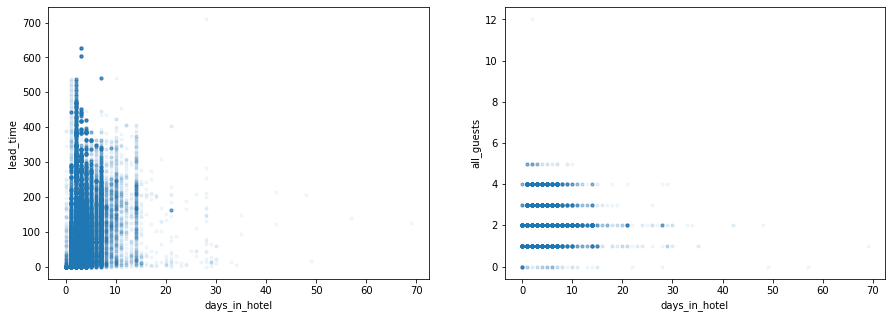

In [30]:
#Zaleznosc dni spedzaonych od planowanej rezerwacji
plt.subplot(1,2,1)
plot_two_columns('days_in_hotel', 'lead_time')

#Zaleznosc dni spedzoncyh od gosci
plt.subplot(1,2,2)
plot_two_columns('days_in_hotel', 'all_guests')


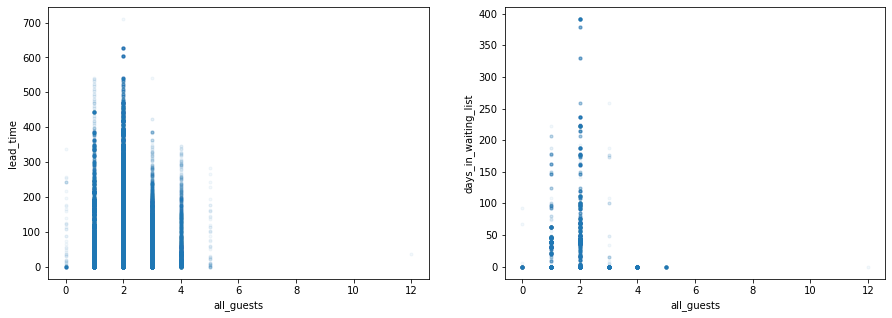

In [33]:
#Zaleznosc gosci od planowanej rezerwacji
plt.subplot(1,2,1)
plot_two_columns('all_guests', 'lead_time')

#Zaleznosc gosci od dlugosci oczekiwania na potwierdzenie rezerwacji
plt.subplot(1,2,2)
plot_two_columns('all_guests', 'days_in_waiting_list')

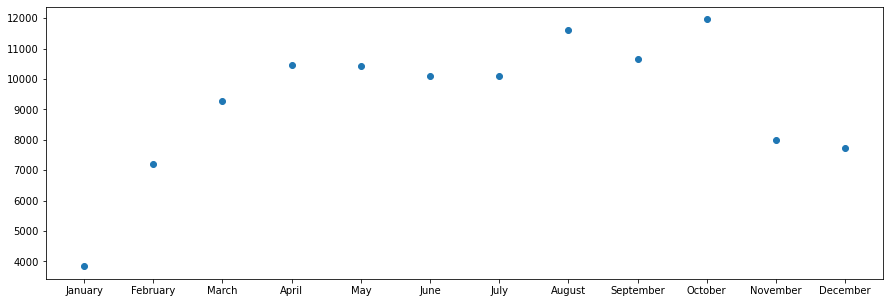

In [36]:
#Miesiac a ilosc gosci
months_to_guests = {}
for i in range(len(df)):
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)


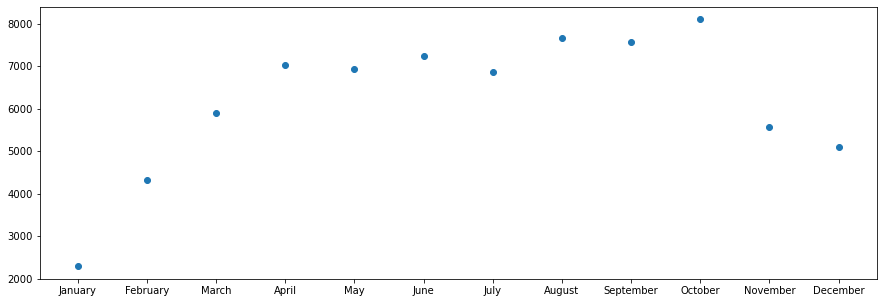

In [37]:
#Miesiac a ilosc gosci dla city hotel
months_to_guests = {}
for i in range(len(df)):
    if df['hotel'][i] != 'City Hotel':
        continue
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)

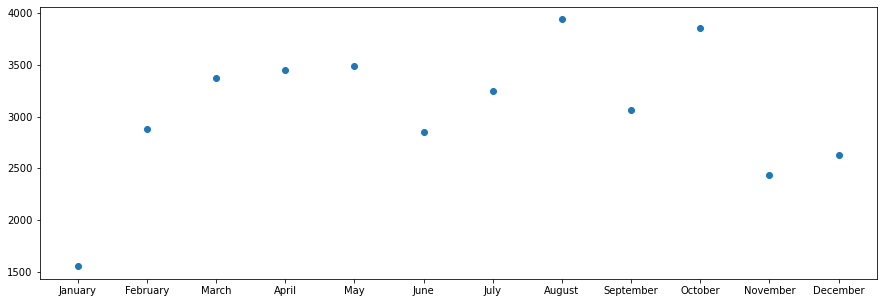

In [38]:
#Miesiac a ilosc gosci dla city hotel
months_to_guests = {}
for i in range(len(df)):
    if df['hotel'][i] != 'Resort Hotel':
        continue
    month = df['arrival_date_month'][i]
    if month not in months_to_guests:
        months_to_guests[month] = 0
    months_to_guests[month] += df['all_guests'][i]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
months_to_guests_values = []
for month in months:
    months_to_guests_values.append(months_to_guests[month])

plt.scatter(months, months_to_guests_values)

In [32]:
#Elementy odosobnione

In [44]:
#Metoda 3 sigma
def show_isolated_cases(column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    limit = 3.0 * std
    
    idx = 0
    for value in df[column_name]:
        if np.fabs(value - mean) > limit:
            plt.plot(idx, value, marker='.', color='red')
        else:
            plt.plot(idx, value, marker='.', color='blue')
        idx += 1
    plt.ylabel(column_name)
    plt.xlabel('Liczba porzadkowa')

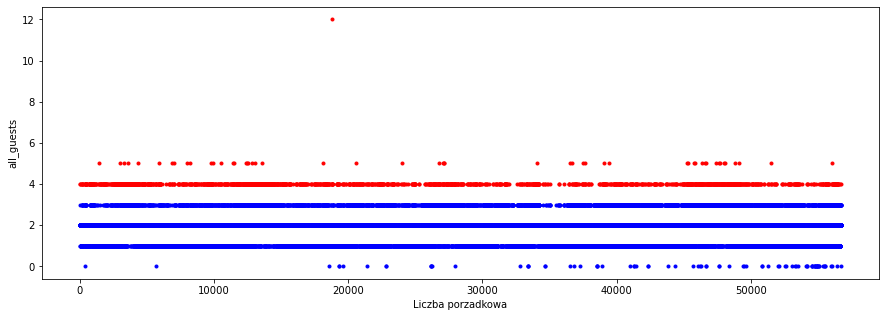

In [45]:
#Liczba gosci
show_isolated_cases('all_guests')

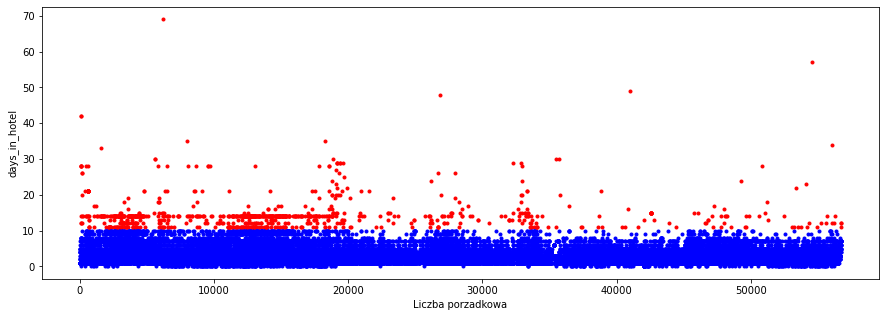

In [46]:
#Czas pobytu
show_isolated_cases('days_in_hotel')

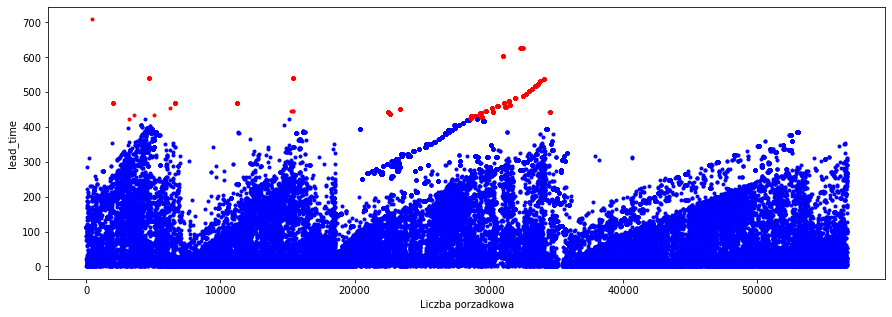

In [47]:
#Wczesniejsza rezerwacja
show_isolated_cases('lead_time')

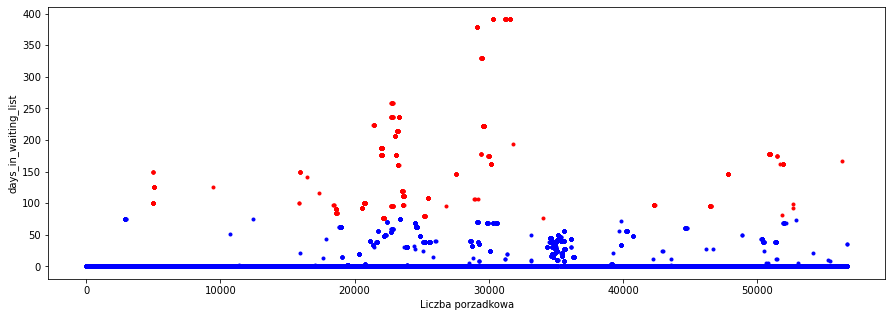

In [48]:
#Oczekiwanie na akceptacje rezerwacji
show_isolated_cases('days_in_waiting_list')